In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinas_AutoInt as ru

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# cargando datos

######  n=2 #####
radSigmMasa2 = np.load('Datos/fondo_n2/radSigmMasa_n2.npz', allow_pickle=True)
Sig0R99M99EnergyT2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2.npz', allow_pickle=True)

######  n=2 P #####
npzfileEing_VectP2 = np.load('ReEing_n2P.npz', allow_pickle=True)
dataInP2 = np.loadtxt('Datos/espectroP_n2/Data_1.dat', unpack=True)

radSigmMasaP2 = np.load('Datos/fondo_n2/radSigmMasa_n2_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTP2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2_Pos.npz', allow_pickle=True)

######  n=2 N #####
radSigmMasaN2 = np.load('Datos/fondo_n2/radSigmMasa_n2_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTN2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2_Neg.npz', allow_pickle=True)

In [5]:
############## n=2   #######
Sig0R99M99Energy2 = Sig0R99M99EnergyT2['arr_0']
radSigmMasa2 = radSigmMasa2['arr_0']

##### P #####
Sig0R99M99EnergyP2 = Sig0R99M99EnergyTP2['arr_0']
radSigmMasaP2 = radSigmMasaP2['arr_0']

##### N #####
Sig0R99M99EnergyM2 = Sig0R99M99EnergyTN2['arr_0']
radSigmMasaM2 = radSigmMasaN2['arr_0']

dataP2 = list(npzfileEing_VectP2['arr_0'])
namAmplDatP2, namEnValDatP2, namEnVectDatP2 = [], [], []
for i in dataP2:
    temp1, temp2, temp3 = i
    namAmplDatP2.append(temp1)
    namEnValDatP2.append(temp2)
    namEnVectDatP2.append(temp3)

In [6]:
solPlot = [[1.0, 43.20013959854191, 1, -1, 2, [2.89857968, 7.59309332], 'DOP853', 1e-13, 1e-15, 1.0598489678434937], 
           [1.0, 38.83781382571708, 1, 0, 2, [3.04965466, 7.36091012], 'DOP853', 1e-13, 1e-15, 1.34370064953022],
           [1.0, 33.98239522336313, 1, 1, 2, [3.21567298, 7.08762372], 'DOP853', 1e-13, 1e-15, 1.7747065607002397]]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_58290/3539304367.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


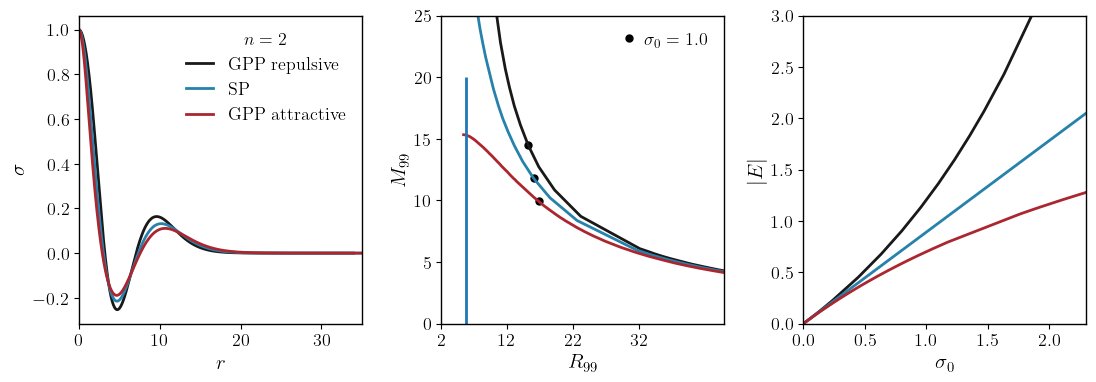

In [7]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

#profilesNumb = len(radSigmMasaN_P)

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

#for i in kval:
i = 36
#ax[0].plot(radSigmMasaP1[i][0], radSigmMasaP1[i][1], color=col[0], label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[2])
ax[0].plot(rD, sD, color=col[0], label=r'GPP repulsive')  # label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0]
ax[1].plot(Sig0R99M99EnergyP2[i, 1], Sig0R99M99EnergyP2[i, 2], ls='', c='k', marker='o', markersize=5, label=r'$\sigma_0 = %2.1f$'%sD[0])

i = 35
#ax[0].plot(radSigmMasa[i][0], radSigmMasa[i][1], color=col[2], label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[1])
ax[0].plot(rD, sD, color=col[2], label=r'SP')  # , label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0]
ax[1].plot(Sig0R99M99Energy2[i, 1], Sig0R99M99Energy2[i, 2], c='k', marker='o', markersize=5)
#ax[1].plot(Sig0R99M99EnergyC[i, 1], Sig0R99M99EnergyC[i, 2], c='k', marker='o', markersize=5)

i = 76
#ax[0].plot(radSigmMasaM1[i][0], radSigmMasaM1[i][1], color=col[3], label=r'$\sigma_0 = %5.4f$'%radSigmMasaM1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[0])
ax[0].plot(rD, sD, color=col[3], label=r'GPP attractive')
ax[1].plot(Sig0R99M99EnergyM2[i, 1], Sig0R99M99EnergyM2[i, 2], c='k', marker='o', markersize=5)
#ax[1].plot(Sig0R99M99EnergyM1C[i, 1], Sig0R99M99EnergyM1C[i, 2], c='k', marker='o', markersize=5)

#########
ax[1].plot(Sig0R99M99EnergyP2[:, 1], Sig0R99M99EnergyP2[:, 2], color=col[0], ls='-')#, label=r'GPP repulsive')

#temp1 = np.concatenate((Sig0R99M99Energy[:, 1], Sig0R99M99EnergyC[1:, 1]))
#temp2 = np.concatenate((Sig0R99M99Energy[:, 2], Sig0R99M99EnergyC[1:, 2]))
#ax[1].plot(temp1, temp2, color=col[2], ls='-')
ax[1].plot(Sig0R99M99Energy2[:, 1], Sig0R99M99Energy2[:, 2], color=col[2], ls='-')#, label=r'SP')

#temp1 = np.concatenate((Sig0R99M99EnergyM1[:-1, 1], Sig0R99M99EnergyM1C[1:, 1]))
#temp2 = np.concatenate((Sig0R99M99EnergyM1[:-1, 2], Sig0R99M99EnergyM1C[1:, 2]))
#ax[1].plot(temp1, temp2, color=col[3], ls='-')
ax[1].plot(Sig0R99M99EnergyM2[:-2, 1], Sig0R99M99EnergyM2[:-2, 2], color=col[3], ls='-')#, label=r'GPP attractive')

ax[2].plot(Sig0R99M99EnergyP2[:, 0], np.abs(Sig0R99M99EnergyP2[:, 3]), color=col[0], ls='-')
ax[2].plot(Sig0R99M99Energy2[:, 0], np.abs(Sig0R99M99Energy2[:, 3]), color=col[2], ls='-')

#temp1 = np.concatenate((Sig0R99M99EnergyM1[:, 0], Sig0R99M99EnergyM1C[1:, 0]))
#temp2 = np.concatenate((Sig0R99M99EnergyM1[:, 3], Sig0R99M99EnergyM1C[1:, 3]))
#ax[2].plot(temp1, np.abs(temp2), color=col[3], ls='-')
ax[2].plot(Sig0R99M99EnergyM2[:, 0], np.abs(Sig0R99M99EnergyM2[:, 3]), color=col[3], ls='-')

ax[0].set_xlim(0, 35)

ax[1].set_xlim(2., 45)
ax[1].set_ylim(0, 25)
ax[1].set_xticks([2, 12, 22, 32])

ax[2].set_xlim(0.0, 2.3)
ax[2].set_ylim(0, 3)

#ax[1].set_xscale('log')
#ax[1].set_yscale('log')

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\sigma$')
#ax[0].set_xlabel(r'$r \,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[0].set_ylabel(r'$\sigma \,[c_2]$')

ax[1].set_xlabel(r'$R_{99}$')
ax[2].set_xlabel(r'$\sigma_0$')
#ax[1].set_xlabel(r'$R_{99}\,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[2].set_xlabel(r'$\sigma_0\,[c_2]$')

ax[1].set_ylabel(r'$M_{99}$')
ax[2].set_ylabel(r'$|E|$')
#ax[1].set_ylabel(r'$M(R_{99})\,[c\hbar/(Gm\Lambda^{1/2})]$')
#ax[2].set_ylabel(r'$|E|\,[2c^2m/\Lambda]$')

#ax[1].axvspan(xmin=-1e-02, xmax=1e-02, ymin=0, ymax=1, color='gray')

ax[1].legend(frameon=False, fontsize=13, handlelength=0.1)
ax[0].legend(loc='upper right', frameon=False, title=r'$n=2$', fontsize=13)

ax[1].vlines(x=5.822191526060082,ymin=0, ymax=20)

In [26]:
, Sig0R99M99EnergyM2[-5, 0], Sig0R99M99EnergyM2[-5, 1]

(11.77779839598963, 5.822191526060082)

In [8]:
fig.savefig('Fondo_n2.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
## Funcional de Energia

In [8]:
dataEnfM1, dataTfM1, dataFfM1 = [], [], []

Lamb = -1  # autointeraccion
for i in radSigmMasaM2: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfM1.append([sig[0], Enf])
    dataTfM1.append([sig[0], Tfval])
    dataFfM1.append([sig[0], Ffval])

dataEnfM1 = np.array(dataEnfM1)
dataTfM1 = np.array(dataTfM1)
dataFfM1 = np.array(dataFfM1)

/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:193: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Fval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointerac

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_58290/778217998.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


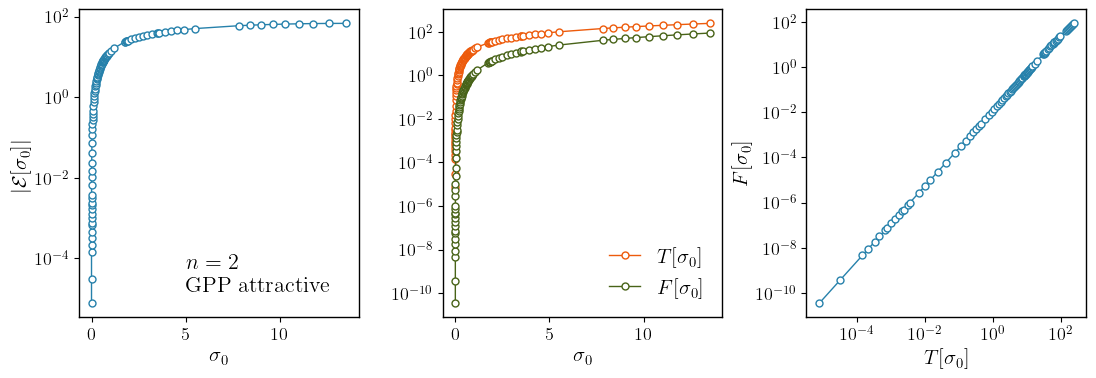

In [9]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=5, y=5.5e-05, s=r'$n=2$')
ax[0].text(x=5, y=1.5e-05, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

In [ ]:
np.savetxt('F_G_n2.dat', np.array([dataTfM1[:-2, 0], dataTfM1[:-2, 1], dataFfM1[:-2, 1]]).T)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_56374/3108929136.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


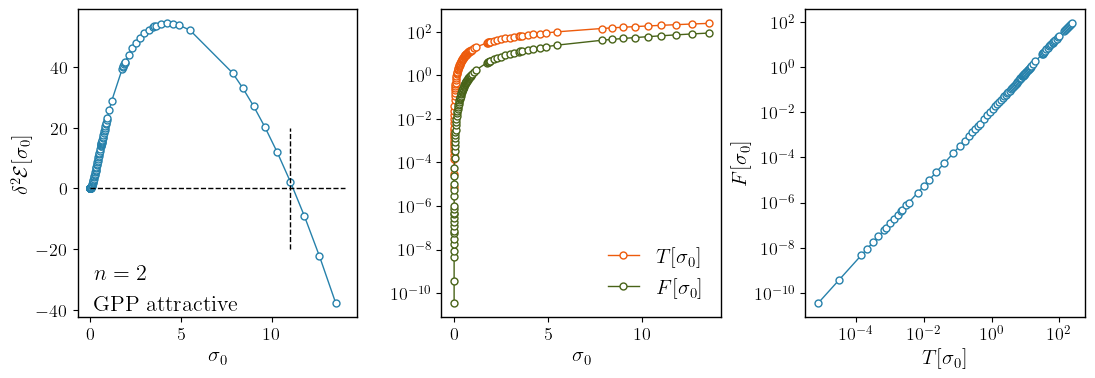

In [24]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


#ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
#           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].plot(dataTfM1[:-2, 0], 2*dataTfM1[:-2, 1]-6*dataFfM1[:-2, 1], ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=0.2, y=-30, s=r'$n=2$')
ax[0].text(x=0.2, y=-40, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
#ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$\delta^2 \mathcal{E}[\sigma_0]$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[0].vlines(x=11, ymin=-20, ymax=20, ls='--', lw=1, color='k')
ax[0].hlines(y=0, xmin=0, xmax=14, ls='--', lw=1, color='k')

ax[1].legend(frameon=False)

In [10]:
fig.savefig('EreL_n2LambM1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [11]:
dataEnfP1, dataTfP1, dataFfP1 = [], [], []

Lamb = 1  # autointeraccion
for i in radSigmMasaP2: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfP1.append([sig[0], Enf])
    dataTfP1.append([sig[0], Tfval])
    dataFfP1.append([sig[0], Ffval])

dataEnfP1 = np.array(dataEnfP1)
dataTfP1 = np.array(dataTfP1)
dataFfP1 = np.array(dataFfP1)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_31610/3365655965.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


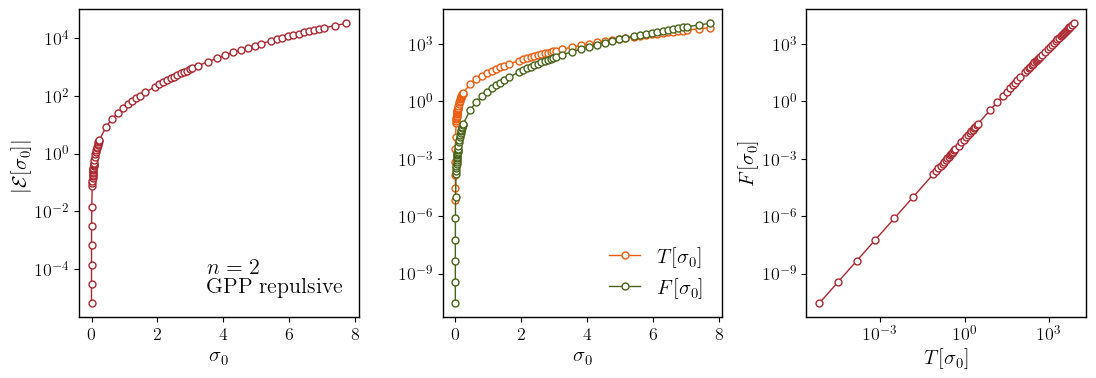

In [12]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfP1[:-2, 0], np.abs(dataEnfP1[:-2, 1]), ls='-', lw=1, marker='o', markersize=5, color=col[3], mfc='white')
ax[0].text(x=3.5, y=7.5e-05, s=r'$n=2$')
ax[0].text(x=3.5, y=1.5e-05, s=r'GPP repulsive') #s=r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfP1[:-2, 0], dataTfP1[:-2, 1], c=col[6], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfP1[:-2, 0], dataFfP1[:-2, 1], c=col[5], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfP1[:-2, 1], dataFfP1[:-2, 1], c=col[3], ls='-', lw=1, marker='o', markersize=5,mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

In [13]:
fig.savefig('EreL_n2LambP1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [36]:
## Autovalores 

In [3]:
# cargando datos L=0
# [dato1, dato2, ...]  -> dato = [s0, AutoVal, AutoVec] -> AutoVal = [a1, a2, ...], AutoVec -> [[vec1], [vec2]]

##### Lamb=0 #####
datan2 = np.load('AutovaloresSep/ReEing_n2_L0_old.npy', allow_pickle=True)
dataIn = np.loadtxt('Datos/n2_L0_old/Data_0_0.dat', unpack=True)

##### Lamb=1 #####
datan2P = np.load('AutovaloresSep/ReEingP_n2_L0.npy', allow_pickle=True)
dataInP1 = np.loadtxt('Datos/n2_L0_P/Data_1_0.dat', unpack=True)

datan2P2 = np.load('AutovaloresSep/ReEingP_n2_L0_old.npy', allow_pickle=True)
dataInP12 = np.loadtxt('Datos/n2_L0_P_old/Data_1_0.dat', unpack=True)

##### Lamb=-1 #####
datan2M = np.load('AutovaloresSep/ReEingM_n2_L0.npy', allow_pickle=True)
dataInM1 = np.loadtxt('Datos/n2_L0_N/Data_-1_0.dat', unpack=True)

datan2M2 = np.load('AutovaloresSep/ReEingM_n2_L0_old.npy', allow_pickle=True)
dataInM12 = np.loadtxt('Datos/n2_L0_N_old/Data_-1_0.dat', unpack=True)

In [4]:
# datos convergencia isla Lamb=1
conveg = np.load('Conv_n2/Convergencia_n2P_L0.npy', allow_pickle=True)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_67327/594836135.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),


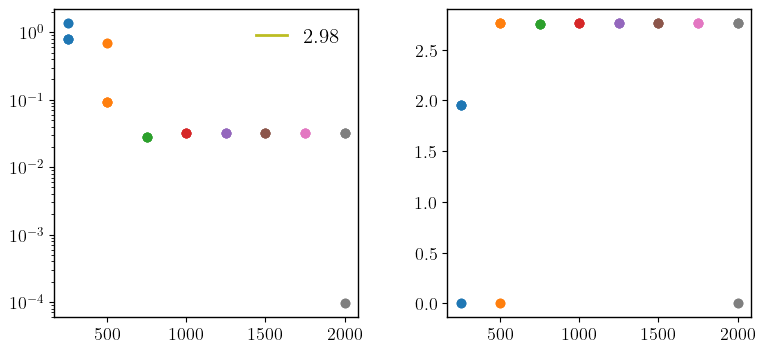

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.29))

for i in conveg[16]:
    s0, Npts, temp1, temp2 = i
    num = len(temp1)
    ax[0].plot([Npts]*num, temp1, 'o')
    ax[1].plot([Npts]*num, temp2, 'o')

ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[0].plot([], [], label=r'$%3.2f$'%s0)
ax[0].legend(frameon=False)

In [5]:
# Caso Positivo
dats0P, datEingP, dataEingVectP = ru.DatSepara(datan2P)  # Lamb=1
dats0P2, datEingP2, dataEingVectP2 = ru.DatSepara(datan2P2)  # Lamb=1

# Caso Negativo
dats0M, datEingM, dataEingVectM = ru.DatSepara(datan2M)  # Lamb=-1
dats0M2, datEingM2, dataEingVectM2 = ru.DatSepara(datan2M2)  # Lamb=-1

# Caso nulo
dats0, datEing, dataEingVect = ru.DatSepara(datan2)  # Lamb=0

In [266]:
#AutoValNotP, AutoVectNotP = ru.choosing(datEingP, dataEingVectP, dataInP1, Rtol=1e-04, Atol=1e-04, NoTriv=False)
#AutoValNotP2, AutoVectNotP2 = ru.choosing(datEingP2, dataEingVectP2, dataInP12, Rtol=1e-04, Atol=1e-04, NoTriv=False)

#plt.plot((Autovect[-11][0][0])[1:-1], -(Autovect[-11][0][2])[0]/((Autovect[-7][0][2])[0])[0])
#plt.plot((Autovect[-11][0][0])[1:-1], (Autovect[-11][0][1])[0])
#plt.xlim(0, 30)

In [6]:
# nulo

# filtrando
Autovalores2 = []
for i in datEing:
    ind1 = np.abs(np.imag(i))>1e-10
    ind2 = np.abs(np.real(i))<1e3
    ind = ind1*ind2
    Autovalores2.append(i[ind])

In [7]:
np.save('AutovN2.npy', np.array([dats0, Autovalores2], dtype=object))

In [8]:
# negativo
datos0 = [dats0M, datEingM, dataEingVectM]
datos = [dats0M2, datEingM2, dataEingVectM2]

dataSigma0M, AutovaloresM, AutovectM = ru.Uniendo(datos0, datos)

# filtrando

Autovalores2M = []
for i in AutovaloresM:
    ind1 = np.abs(np.imag(i))>1e-10
    ind2 = np.abs(np.real(i))<1e3
    ind = ind1*ind2
    Autovalores2M.append(i[ind])

In [9]:
np.save('AutovN2M.npy', np.array([dataSigma0M, Autovalores2M], dtype=object))

In [10]:
# positivo
#datos0 = [dats0P, AutoValNotP, AutoVectNotP]
#datos = [dats0P2, AutoValNotP2, AutoVectNotP2]

datos0 = [dats0P, datEingP, dataEingVectP]
datos = [dats0P2, datEingP2, dataEingVectP2]

dataSigma0P, AutovaloresP, AutovectP = ru.Uniendo(datos0, datos)

# filtrando

Autovalores2P = []
for i in AutovaloresP:
    ind = np.abs(np.imag(i))>1e-10
    Autovalores2P.append(i[ind])

In [11]:
np.save('AutovN2P.npy', np.array([dataSigma0P, Autovalores2P], dtype=object))

In [315]:
ModoInesN2Lamb0_1 = 0.00037420+0.00507753j
ModoInesN2Lamb0_2 = 0.00051995+0.00225911j
ModoEsca = lambda M, lval: lval*M**2

#Sig0R99M99EnergyM1[i, 1], Sig0R99M99EnergyM1[i, 2]
fondo = np.copy(Sig0R99M99Energy2)

datosEsca1 = []
for i in range(len(fondo)):
    temp = ModoEsca(fondo[i, 2], ModoInesN2Lamb0_1)
    datosEsca1.append([fondo[i, 0], temp])
datosEsca1 = np.array(datosEsca1)

datosEsca2 = []
for i in range(len(fondo)):
    temp = ModoEsca(fondo[i, 2], ModoInesN2Lamb0_2)
    datosEsca2.append([fondo[i, 0], temp])
datosEsca2 = np.array(datosEsca2)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_76462/2728089264.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),


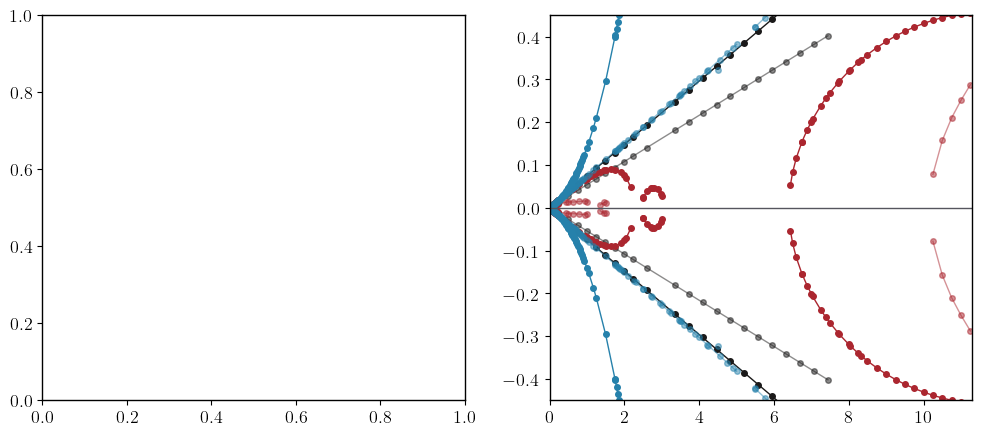

In [324]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0)
for i in range(ncasos):
    y = Autovalores2[i]
    x = dats0[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[0], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[0])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[0])

####
datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dataSigma0P)
for i in range(ncasos):
    y = Autovalores2P[i]
    x = dataSigma0P[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[3], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[3])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[3])

#####

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dataSigma0M)
for i in range(ncasos):
    y = Autovalores2M[i]
    x = dataSigma0M[i]
    #
    temp = ru.roundElem(y, dec=8)
    if temp is not None:
        if len(temp[0])>1 and len(temp[0])<3:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[2], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[2])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[2])


######

#plt.yscale('log')
ax[1].set_xlim(0, 11.3)
ax[1].set_ylim(-.45, .45)

ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_30790/3107078285.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(9.2, 5))


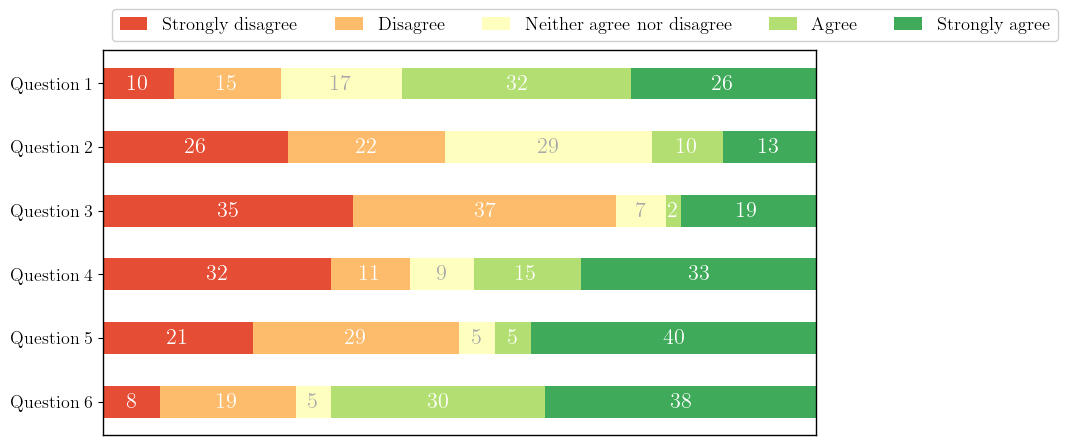

In [12]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_30790/1981654543.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(9.2, 5))


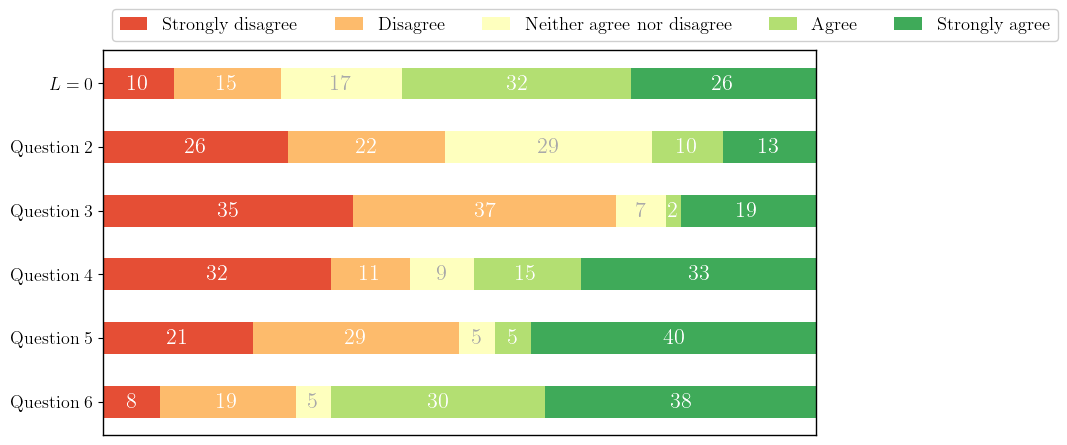

In [13]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    r'$L=0$': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [16]:
# AutoValNot, AutoVectNot = ru.choosing(datEing, dataEingVect, dataIn, Rtol=3e-04, Atol=3e-04, NoTriv=False)
AutoValNotP, AutoVectNotP = ru.choosing(datEingP, dataEingVectP, dataInP1, Rtol=3e-04, Atol=3e-04, NoTriv=False)
AutoValNotM, AutoVectNotM = ru.choosing(datEingM[:-12], dataEingVectM[:-12], dataInM1[:-12], Rtol=8e-03, Atol=8e-03, NoTriv=False)
AutoValNotM2, AutoVectNotM2 = ru.choosing(datEingM[-10:-8], dataEingVectM[-10:-8], dataInM1[-10:-8], Rtol=8e-03, Atol=8e-03, NoTriv=False)

AutoValNotP2, AutoVectNotP2 = ru.choosing(datEingP2, dataEingVectP2, dataInP12, Rtol=3e-04, Atol=3e-04, NoTriv=False)

In [17]:
ModoInesN2Lamb0_1 = 0.00037420+0.00507753j
ModoInesN2Lamb0_2 = 0.00051995+0.00225911j
ModoEsca = lambda M, lval: lval*M**2

#Sig0R99M99EnergyM1[i, 1], Sig0R99M99EnergyM1[i, 2]
fondo = np.copy(Sig0R99M99Energy2)

datosEsca1 = []
for i in range(len(fondo)):
    temp = ModoEsca(fondo[i, 2], ModoInesN2Lamb0_1)
    datosEsca1.append([fondo[i, 0], temp])
datosEsca1 = np.array(datosEsca1)

datosEsca2 = []
for i in range(len(fondo)):
    temp = ModoEsca(fondo[i, 2], ModoInesN2Lamb0_2)
    datosEsca2.append([fondo[i, 0], temp])
datosEsca2 = np.array(datosEsca2)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_67327/3583369192.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


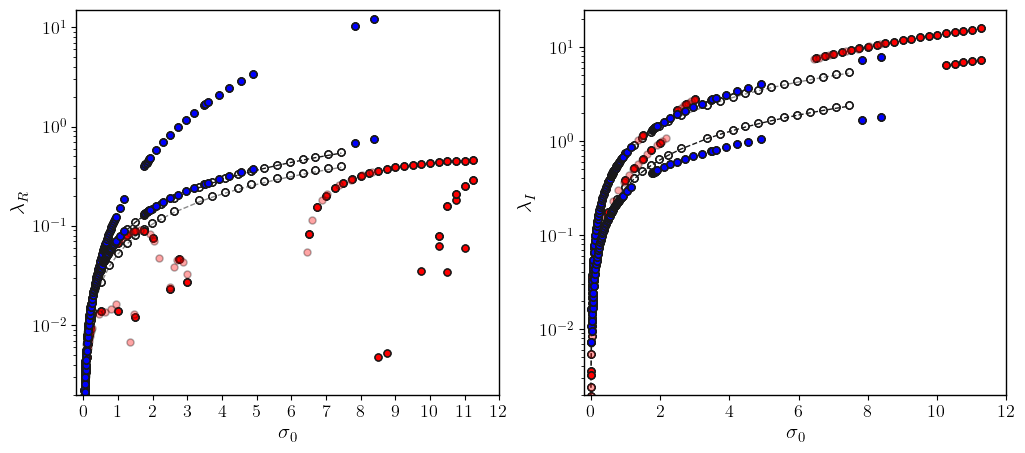

In [35]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

ax[0].set_yscale('log')
ax[1].set_yscale('log')

Ntot = len(AutoValNot)
for i in range(Ntot):
    x, _, _ = dataIn[i]
    y = AutoValNot[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)

    ax[0].plot([x]*Neing, yR, ls=' ', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=' ', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])

ax[0].plot(datosEsca1[:,0], np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[1].plot(datosEsca1[:,0], np.imag(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)

ax[0].plot(datosEsca2[:,0], np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0])
ax[1].plot(datosEsca2[:,0], np.imag(datosEsca2[:,1]), ls='--', lw=1, c=col[0])


Ntot = len(AutoValNotP)
datx = []
for i in range(Ntot):
    x, _, _ = dataInP1[i]
    y = AutoValNotP[i]
    datx.append(x)
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)
    Valymax = np.max(yR) if Neing!=0 else None
    for j in range(Neing):
        valor = yR[j]
        s0 = radSigmMasaP2[i][1][0]
        ax[0].plot([x], yR[j], ls=' ', marker='o', markersize=5, c=col[0], mfc='red', alpha=1) #, c=col[k])
        ax[1].plot([x], yI[j], ls=' ', marker='o', markersize=5, c=col[0], mfc='red', alpha=1) #, c=col[k])


Ntot = len(AutoValNotP2)
datx2 = []
for i in range(Ntot):
    x, _, _ = dataInP12[i]
    y = AutoValNotP2[i]
    datx2.append(x)
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)
    Valymax = np.max(yR) if Neing!=0 else None
    for j in range(Neing):
        valor = yR[j]
        s0 = radSigmMasaP2[i][1][0]
        ax[0].plot([x], yR[j], ls=' ', marker='o', markersize=5, c=col[0], mfc='red', alpha=0.1) #, c=col[k])
        ax[1].plot([x], yI[j], ls=' ', marker='o', markersize=5, c=col[0], mfc='red', alpha=0.1) #, c=col[k])



        
Ntot = len(AutoValNotM)
for i in range(Ntot):
    x, _, _ = dataInM1[i]
    y = AutoValNotM[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])

Ntot2 = len(AutoValNotM2)
for i in range(Ntot2):
    x, _, _ = dataInM1[Ntot+1+i]
    y = AutoValNotM2[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[1].set_ylabel(r'$\lambda_{I}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')

ax[0].set_xlim(-0.2, 12)
ax[0].set_ylim(2e-3, 15)
#ax[0].set_xlim(-0.2, 4)
#ax[0].set_ylim(1e-6, 0.15)
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


ax[1].set_xlim(-0.2, 12)
ax[1].set_ylim(2e-3, 25)

ax[0].legend(frameon=False)

#ax[0].vlines(x=4.435127186635542, ymin=1e-05, ymax= 10)

In [15]:
test = [1.3527059343392929, 1.4686233024119648, 2.505793993076834, 2.606938425707113, 2.7041074517814025,
        2.7977083966162097, 2.8880888358250023, 2.9755474163311884]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_30790/207281902.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5.),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


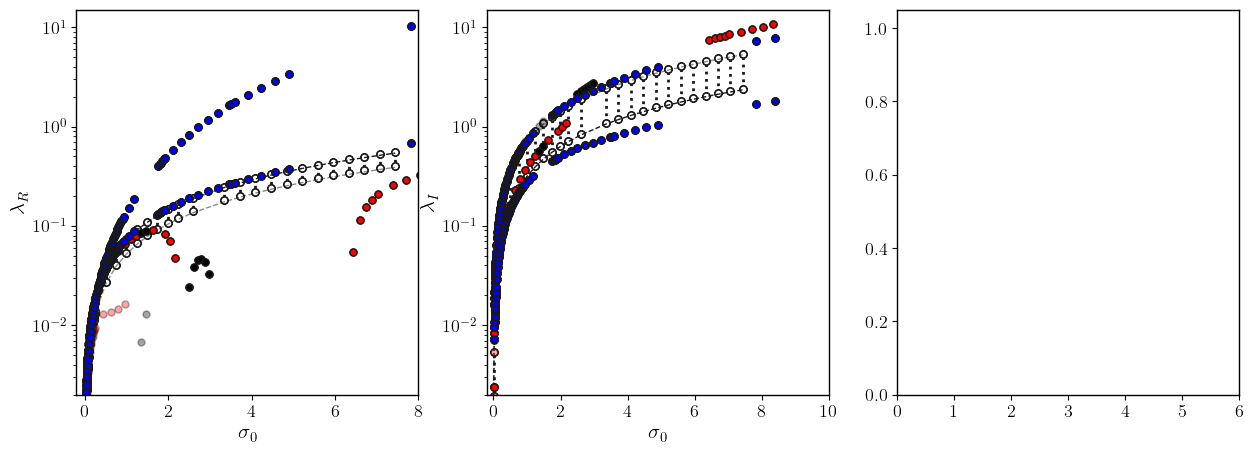

In [20]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

ax[0].set_yscale('log')
ax[1].set_yscale('log')

Ntot = len(AutoValNot)
for i in range(Ntot):
    x, _, _ = dataIn[i]
    y = AutoValNot[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)

    ax[0].plot([x]*Neing, yR, ls=':', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=':', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])

ax[0].plot(datosEsca1[:,0], np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[1].plot(datosEsca1[:,0], np.imag(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)

ax[0].plot(datosEsca2[:,0], np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0])
ax[1].plot(datosEsca2[:,0], np.imag(datosEsca2[:,1]), ls='--', lw=1, c=col[0])


Ntot = len(AutoValNotP)
for i in range(Ntot):
    x, _, _ = dataInP1[i]
    y = AutoValNotP[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)
    Valymax = np.max(yR) if Neing!=0 else None
    for j in range(Neing):
        valor = yR[j]
        alphaval = 0.1 if valor<Valymax else 1
        s0 = radSigmMasaP2[i][1][0]
        colores = 'black' if s0 in test else 'red'
        ax[0].plot([x], yR[j], ls=':', marker='o', markersize=5, c=col[0], mfc=colores, alpha=alphaval) #, c=col[k])
        ax[1].plot([x], yI[j], ls=':', marker='o', markersize=5, c=col[0], mfc=colores, alpha=alphaval) #, c=col[k])


    #x2, y2 = radSigmMasaP2[i][0], radSigmMasaP2[i][1]
    #for j in AutoVectNot[i]:
    #    rval, datA, datB = j
    #    cte = x/np.abs(datB[0]).max()
        #ax[2].plot(rval[1:-1], np.real(datB[0])/np.real(datB[0][0]), lw=0.5, label=r'$\sigma_0=%3.2f$'%x) # , c=col[k]
        #ax[2].plot(x2, y2/y2[0], '--', lw=0.5) # , c=col[k]
    #k += 1
        
Ntot = len(AutoValNotM)
#k = 0
for i in range(Ntot):
    x, _, _ = dataInM1[i]
    y = AutoValNotM[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    #print(y)
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    #x2, y2 = radSigmMasaP2[i][0], radSigmMasaP2[i][1]
    #for j in AutoVectNot[i]:
    #    rval, datA, datB = j
    #    cte = x/np.abs(datB[0]).max()
        #ax[2].plot(rval[1:-1], np.real(datB[0])/np.real(datB[0][0]), lw=0.5, label=r'$\sigma_0=%3.2f$'%x) # , c=col[k]
        #ax[2].plot(x2, y2/y2[0], '--', lw=0.5) # , c=col[k]
    #k += 1

Ntot2 = len(AutoValNotM2)
for i in range(Ntot2):
    x, _, _ = dataInM1[Ntot+1+i]
    y = AutoValNotM2[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    #print(y)
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=' ', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[1].set_ylabel(r'$\lambda_{I}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')

ax[0].set_xlim(-0.2, 8)
ax[0].set_ylim(2e-3, 15)
#ax[0].set_xlim(-0.2, 4)
#ax[0].set_ylim(1e-6, 0.15)


ax[1].set_xlim(-0.2, 10)
ax[1].set_ylim(2e-3, 15)

ax[2].set_xlim(0, 6)
ax[2].set_ylim(0, 1.05)
ax[0].legend(frameon=False)

#ax[0].vlines(x=4.435127186635542, ymin=1e-05, ymax= 10)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_76462/3395731727.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),


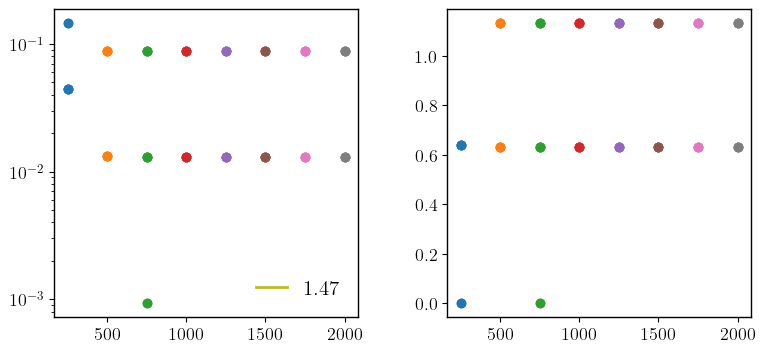

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.29))

for i in conveg[4]:
    s0, Npts, temp1, temp2 = i
    num = len(temp1)
    ax[0].plot([Npts]*num, temp1, 'o')
    ax[1].plot([Npts]*num, temp2, 'o')

ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[0].plot([], [], label=r'$%3.2f$'%s0)
ax[0].legend(frameon=False)

In [52]:
s0

1.3527059343392929